In [162]:
# Import dependencies - run this first
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rampy as rp
import scipy
from scipy.integrate import simps
from numpy import trapz

Imax:  441.6868
peak_index (array([74423]),)
x peak 3.729993
the first index max happen:  74423
Mean baseline current:  -1.277190923856
Peak Current:  441.6868
Area:  19.476832502836412
Pulse Time:  211.4499999999997 milliseconds
Final current:  45.558010923855996
[11.93135092 10.40286492  9.63862292 ... 21.10226092 14.98832092
 13.45983092]


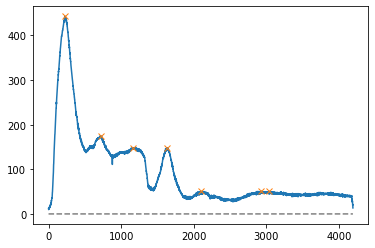

Number of local maxima:  7


In [172]:
# Extract Metrics
# each file has 4 columns of numbers: a=time, b=current, c=noise, d=+/-b
# dt = a[i+1] - a[i] = 5.0e-05 (S)
filename = '181 tcb27.txt'
a, b, c, d = np.loadtxt(filename, unpack=True)
Imax = max(b)
print ('Imax: ', Imax)
# X position
peak_index = np.where(b==Imax)
print ('peak_index', peak_index)
# throw away extra 
peak_index = peak_index[0]
# grab the first position
x_peak = a[peak_index[0]]
print('x peak', x_peak)
peak_index = int(peak_index[0])
print ('the first index max happen: ', peak_index)

# Define noise
if x_peak > 0.5: 
    mean = np.mean(b[range(0, 10000)])
    noise = np.std(b[range(0, 10000)])
else: 
    mean = np.mean(b[range(50000, 60000)])
    noise = np.std(b[range(50000, 60000)])
    
print('Mean baseline current: ', mean)
b = np.subtract(b, mean)
# Define discharge region
discharge_index = []
for i in range(peak_index-10000, peak_index+20000):
    while b[i] > mean+8*noise or b[i-10] > mean+8*noise or b[i-20] > mean+8*noise:
        if b[i-1] > mean+8*noise and b[i+1] > mean+8*noise and b[i] > b[i-1]*.5 and b[i] > b[i-2]*.5 and b[i] > b[i-3]*.5:
            discharge_index = np.append(discharge_index, i)
        break

discharge_index = np.asfarray(discharge_index)
discharge_index = discharge_index.astype(int)
# print(discharge_index)
discharge_time = a[discharge_index]
discharge_current = b[discharge_index]

print("Peak Current: ", Imax)
# Calculate total charge passed by area under curve (related to rxn energy since I correlates to T)
area = trapz(discharge_current, dx=0.00005)
area_simps = simps(discharge_current, dx=0.00005)
print("Area: ", area)

# Calculate discharge time
pulseTime = max(discharge_time) - min(discharge_time)
print("Pulse Time: ", pulseTime*1000, 'milliseconds')

# Catch end current
I_Final = discharge_current[len(discharge_current)-1000]
print('Final current: ', I_Final)

from scipy.signal import find_peaks

print(discharge_current)
x = discharge_current
peaks, _ = find_peaks(x, height=0, distance=100, width=50)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

# Find number of peaks
peak_count = len(peaks)
print("Number of local maxima: ", peak_count)

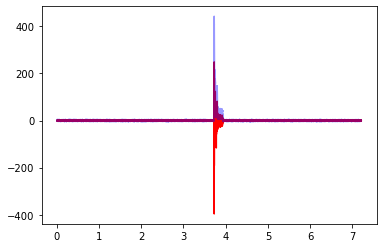

In [192]:
plt.plot(a, d, color='red', alpha=1)
plt.plot(a, b, color='blue', alpha=0.4)

Text(0, 0.5, 'Current (A)')

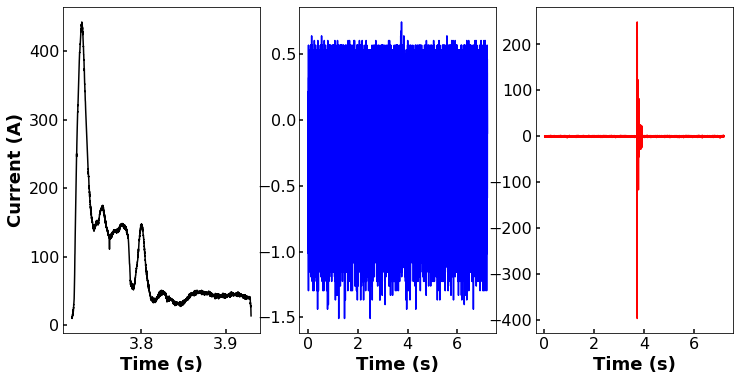

In [178]:
# Plot a single Raman spectrum

# Plot style
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=[12,6])
ax1.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax1.set_xlim(4, 6)
ax2.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax2.set_xlim(4, 6)
ax3.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax3.set_xlim(4, 6)

# Plot
#ax1.plot(a, b, color='red')
ax1.plot(discharge_time, discharge_current, color='black')
ax2.plot(a, c, color='blue')
ax3.plot(a, d, color='red')

ax1.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax2.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax3.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax1.set_ylabel('Current (A)', fontname="Arial", fontsize="18", fontweight = "bold")

In [206]:
txt_files[-1]

'./39 6E.txt'

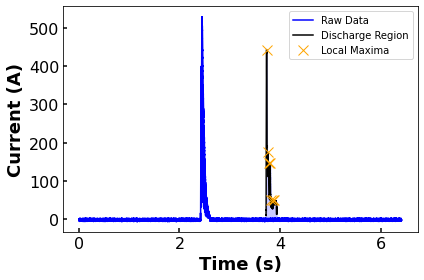

In [207]:
# Plot a single Raman spectrum
filename = txt_files[18]
a, b, c, d = np.loadtxt(filename, unpack=True)

# Plot style
ax = plt.axes()
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
#ax.set_xlim(3, 4)

# Plot
ax.plot(a, b, color='blue', label='Raw Data')
ax.plot(discharge_time, discharge_current, color='black', label='Discharge Region')
ax.plot(discharge_time[peaks], x[peaks], marker='x', markersize=10, color='orange', label='Local Maxima', linestyle='none')
ax.fill_between(x=discharge_time, y1=discharge_current, y2=mean, color='blue', alpha=0.2)
ax.legend()

ax.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax.set_ylabel('Current (A)', fontname="Arial", fontsize="18", fontweight = "bold")

# Format and save
plt.tight_layout()
plt.savefig('SelectedPulseRegion.png', dpi=300) # Change file name
plt.show()

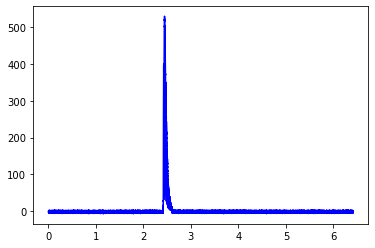

In [203]:
plt.plot(a, b, color='blue', label='Raw Data')

In [208]:
# Snatch all text files in current directory
import os             
all_files = os.listdir()   # imagine you're one directory above test dir
# print(all_files)  # won't necessarily be sorted
import glob
txt_files = glob.glob("./*.txt")
print(txt_files)
print(len(txt_files))

['./99 pa41.txt', './16 20D.txt', './100 pa42.txt', './179 tcb25.txt', './12 18D.txt', './180 tcb26.txt', './35 5D.txt', './70 mc28.txt', './143 t8.txt', './133 mc62.txt', './55 9G.txt', './90 pa34.txt', './8 14C.txt', './93 pa4.txt', './129 mc58.txt', './117 mc45.txt', './111 pa55.txt', './65 mc23.txt', './175 tcb19.txt', './84 pa20.txt', './46 8E.txt', './161 t28.txt', './41 7D.txt', './91 pa35.txt', './67 mc25.txt', './51 3G.txt', './66 mc24.txt', './178 tcb24.txt', './75 mc33.txt', './131 mc60.txt', './10 16C.txt', './34 4F.txt', './47 9D.txt', './1 10C.txt', './110 pa54.txt', './152 t19.txt', './21 25C.txt', './137 t2.txt', './177 tcb21.txt', './85 pa21.txt', './5 12D.txt', './64 mc22.txt', './38 6C.txt', './148 t14.txt', './125 mc53.txt', './28 30C.txt', './2 10E.txt', './112 pa56.txt', './150 t16.txt', './88 pa31.txt', './135 mc7.txt', './80 pa10.txt', './23 28C.txt', './109 pa53.txt', './118 mc46.txt', './116 mc44.txt', './83 pa19.txt', './15 20C.txt', './17 21C.txt', './173 tc

In [209]:
def process_ITcurve(filename):
    print(filename)
    # Extract metrics
    a, b, c, d = np.loadtxt(filename, unpack=True)
    
    # Define maximum
    Imax = max(b)
    # X position
    peak_index = np.where(b==Imax) # Find index of max
    peak_index = peak_index[0]
    x_peak = a[peak_index[0]]
    peak_index = int(peak_index[0])
    
    # Define noise
    if x_peak > 0.5: 
        mean = np.mean(b[range(0, 10000)])
        noise = np.std(b[range(0, 10000)])
    else: 
        mean = np.mean(b[range(50000, 60000)])
        noise = np.std(b[range(50000, 60000)])
    
    # Subtract the baseline current
    b = np.subtract(b, mean)
        
    # Define discharge region
    discharge_index = []
    for i in range(peak_index-10000, peak_index+20000):
        while b[i] > mean+8*noise or b[i-10] > mean+8*noise or b[i-20] > mean+8*noise:
            if b[i-1] > mean+8*noise and b[i+1] > mean+8*noise and b[i] > b[i-1]*.5 and b[i] > b[i-2]*.5 and b[i] > b[i-3]*.5:
                discharge_index = np.append(discharge_index, i)
            break
    discharge_index = np.asfarray(discharge_index)
    discharge_index = discharge_index.astype(int)
    discharge_time = a[discharge_index]
    discharge_current = b[discharge_index]
    # Calculate total charge passed by area under curve (related to rxn energy since I correlates to T)
    area = trapz(discharge_current, dx=0.00005)
    # area_simps = simps(discharge_current, dx=0.00005)
    # print("Area: ", area)
    # print(area_simps)
    
    # Calculate discharge time
    pulseTime = max(discharge_time) - min(discharge_time)
    # print("Pulse Time: ", pulseTime)
    
    # Catch end current
    I_Final = discharge_current[len(discharge_current)-70]

    from scipy.signal import find_peaks

    x = discharge_current
    peaks, _ = find_peaks(x, height=0, distance=100, width=50)
    # Find number of peaks
    peak_count = len(peaks)

    # Assimilate
    current_stats = [Imax, np.mean(discharge_current), area, pulseTime, I_Final, peak_count]
    return current_stats

In [210]:
# Pull text files, assemble into statistics
big_stats = np.asarray([])

for i in range(0, len(txt_files)):
    filename = txt_files[i]
    stats = process_ITcurve(filename)
    stats = np.append(filename, stats)
    print(stats)
    if len(big_stats) == 0:
        big_stats = np.append(big_stats, stats)
    else:
        big_stats = np.vstack((big_stats, stats))
print(big_stats)

./99 pa41.txt
['./99 pa41.txt' '332.018' '109.74184260371881' '18.924321741339504'
 '0.17384999999999984' '30.375760436134' '2.0']
./16 20D.txt
['./16 20D.txt' '366.791' '50.805168755133444' '17.308942297554836'
 '0.35644999999999527' '8.720309882665' '3.0']
./100 pa42.txt
['./100 pa42.txt' '331.2538' '53.46121239503356' '16.77555660159711'
 '0.3165' '13.920744288437' '1.0']
./179 tcb25.txt
['./179 tcb25.txt' '435.955' '126.96054176264796' '26.74966720732355'
 '0.21219999999999972' '69.200953327432' '6.0']
./12 18D.txt
['./12 18D.txt' '97.77777' '23.715932901502548' '4.620607931398013'
 '0.25264999999999915' '8.258707695190001' '1.0']
./180 tcb26.txt
['./180 tcb26.txt' '66.44384' '19.413949248331424' '2.6155064991850576'
 '0.20314999999999994' '13.902326052042' '1.0']
./35 5D.txt
['./35 5D.txt' '87.4605' '44.18472502556676' '3.629207777963745'
 '0.08285000000000009' '35.421294231287995' '1.0']
./70 mc28.txt
['./70 mc28.txt' '685.4801' '136.65237196301044' '24.658488330213313'
 '0.20924

['./106 pa50.txt' '353.4168' '116.28832304930326' '17.09973156951947'
 '0.1482000000000001' '21.363517111527' '3.0']
./79 mc9.txt
['./79 mc9.txt' '370.2301' '51.89086226991598' '17.17807594937024'
 '0.3429500000000001' '9.026465208898' '5.0']
./11 17C.txt
['./11 17C.txt' '290.3668' '31.944407374867097' '15.245016469716532'
 '0.48309999999999986' '16.68141977581' '1.0']
./127 mc56.txt
['./127 mc56.txt' '463.0856' '67.72805777247788' '19.03790484725771'
 '0.2829500000000005' '22.800212716448' '2.0']
./60 mc13.txt
['./60 mc13.txt' '63.38687' '31.408708022643047' '6.659729568669844'
 '0.2277' '7.828745132287' '1.0']
./6 13C.txt
['./6 13C.txt' '141.3396' '62.58874420562054' '11.318662112293833'
 '0.18259999999999987' '28.205233852842' '8.0']
./134 mc2.txt
['./134 mc2.txt' '370.9944' '73.5478472981591' '19.739786890782746'
 '0.2803500000000003' '12.545572363174' '1.0']
./13 19D.txt
['./13 19D.txt' '175.3484' '97.80659554195182' '1.1340856892125608'
 '0.011849999999999028' '173.34629148160698

['./57 mc1.txt' '539.8919' '100.98422480611059' '13.692882891132466'
 '0.13654999999999973' '44.995445522556004' '2.0']
./62 mc20.txt
['./62 mc20.txt' '494.0374' '185.87310253230535' '19.95299104597121'
 '0.10794999999999977' '19.283246435426' '1.0']
./77 mc5.txt
['./77 mc5.txt' '584.218' '58.8795503261391' '18.122622759124226'
 '0.3296500000000009' '19.036473727861' '4.0']
./128 mc57.txt
['./128 mc57.txt' '601.0313' '124.279861073733' '24.24643970474385'
 '0.19600000000000017' '20.203659329243' '2.0']
./153 t20.txt
['./153 t20.txt' '94.7208' '59.6133173633817' '15.773087459072602'
 '0.2673000000000001' '40.394328563873' '6.0']
./165 tcb4.txt
['./165 tcb4.txt' '237.6341' '53.5499658793028' '16.88104195673809'
 '0.31844999999999946' '17.809667242348' '1.0']
./48 9E.txt
['./48 9E.txt' '15.23961' '11.57642661717099' '3.3937939234831154'
 '0.37010000000000076' '12.490546928392' '0.0']
./29 3C.txt
['./29 3C.txt' '380.1653' '54.23454900562878' '20.218176442354693'
 '0.38019999999999987' '7.5

In [229]:
# Create an Excel worksheet
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook('IT_Features_All.xlsx')
worksheet = workbook.add_worksheet()

# Add a bold format to use to highlight cells.
bold = workbook.add_format({'bold': True})

# Write some data headers.
worksheet.write('A1', 'Filename', bold)
worksheet.write('B1', 'Peak Current', bold)
worksheet.write('C1', 'Mean Current', bold)
worksheet.write('D1', 'Area Under Curve', bold)
worksheet.write('E1', 'Pulse Time', bold)
worksheet.write('F1', 'Final Current', bold)
worksheet.write('G1', 'Local Maxima', bold)

# Start from the first cell. Rows and columns are zero indexed.
row = 1
col = 0

for filename, Imax, Imean, Area, PulseTime, Ifinal, LocMax in (big_stats):
    worksheet.write(row, col, filename)
    worksheet.write(row, col+1, float(Imax))
    worksheet.write(row, col + 2, float(Imean))
    worksheet.write(row, col + 3, float(Area))
    worksheet.write(row, col + 4, float(PulseTime))
    worksheet.write(row, col + 5, float(Ifinal))
    worksheet.write(row, col + 6, float(LocMax))
    row += 1
    
workbook.close()

In [224]:
Imax2 = Imax.strip("2")
Imax2

'16.2353'

In [227]:
float (Imax)

216.2353

In [219]:
x = 'ddffd'
x2 = x.strip('d')
x2

'ff'